# Machine Learning with IRIS Dataset 

#### Import IRIS dataset , Visualize the Data and Train Machine Learning Models to Classify the Data

IRIS Dataset has 150 Observations with 50 each of 3 Species of Flowers .


#### Import the Required Libraries for Visualization 

In [9]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

#### Import the Required Libraries for Training the Models

In [39]:
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

In [3]:
import warnings 
warnings.filterwarnings("ignore")

#### Load the IRIS dataset and Perform validations to verify Data Import

In [4]:
iris = pd.read_csv("../Test_Data/Iris.csv") 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print "Shape of Dataset Iris:" ,iris.shape

Shape of Dataset Iris: (150, 6)


In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### DATA VISUALIZATION using different Plots

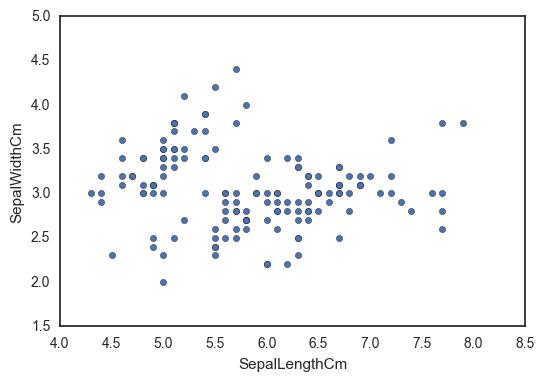

In [18]:
#Scatter Plot

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

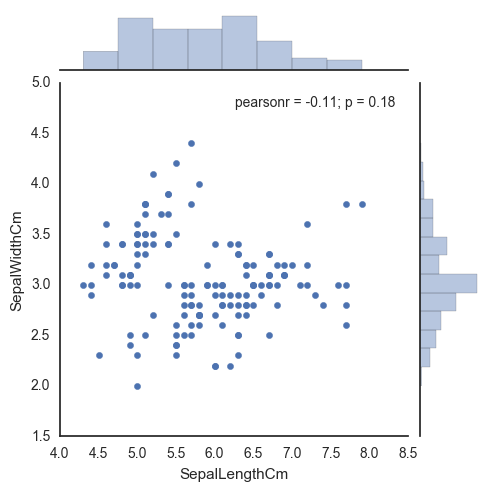

In [12]:
# Joint Plot
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

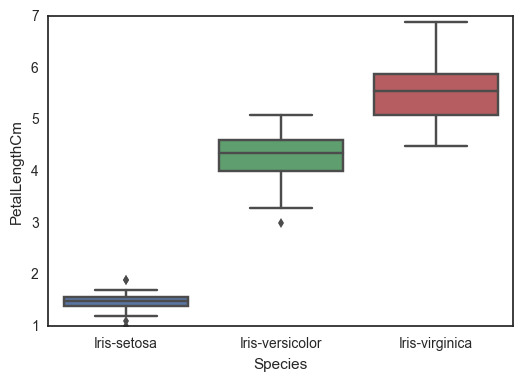

In [14]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

#### Use of Multiple Boxplots Grouped by Species :
    
This Visualization clearly indicates the Range and the Distribution of the various features of the different Species 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000180094E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018DCEB00>]], dtype=object)

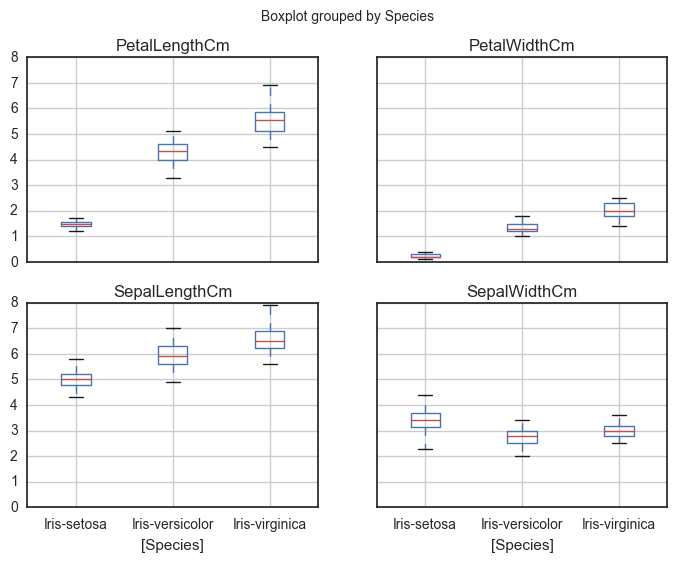

In [23]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(8, 6))

#### Use Violin Plot to show the density - Denser Areas are Fat and Sparse Areas are thin

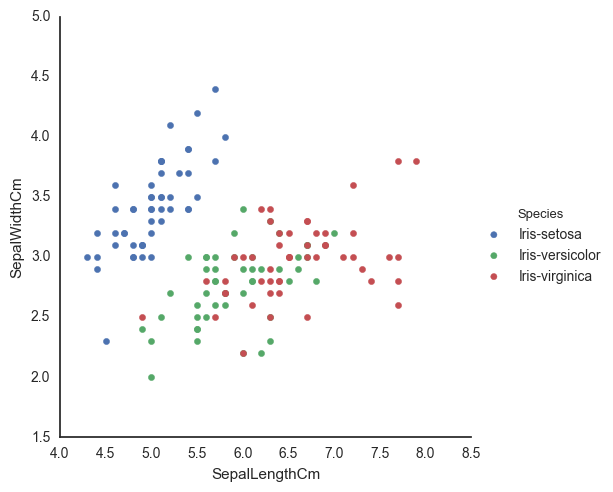

In [13]:
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

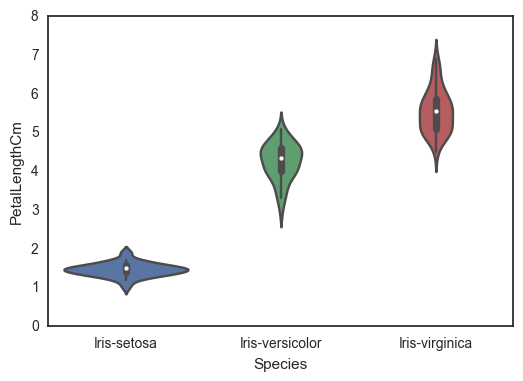

In [15]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

#### Use of kdeplot to Understand the distribution

This plot clearly indicates that the Setosa Species is the most distinguishable species based on its Petal Length Feature .
It has the Shortest Petal Length 

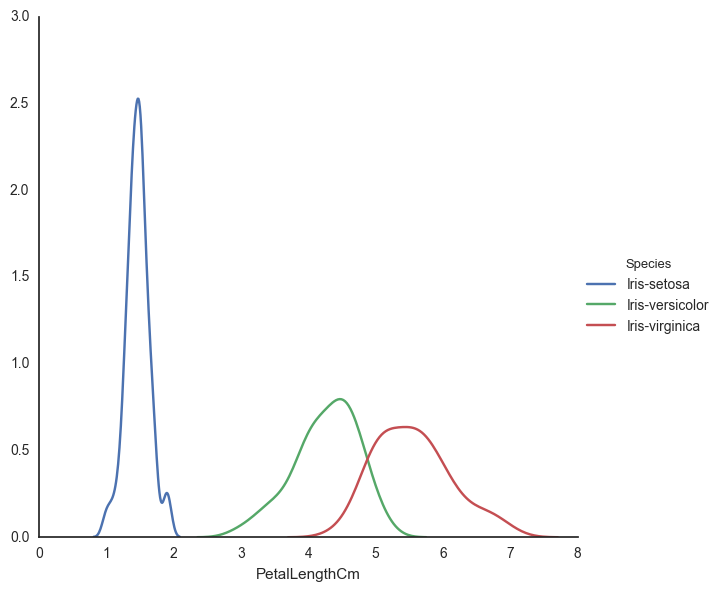

In [16]:
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()


This plot clearly indicates that the Setosa Species is the most distinguishable species based on its Petal Length Feature .
It has the Shortest Petal Length 

#### Pair Plot to show all the Interdepencies in One Visualization

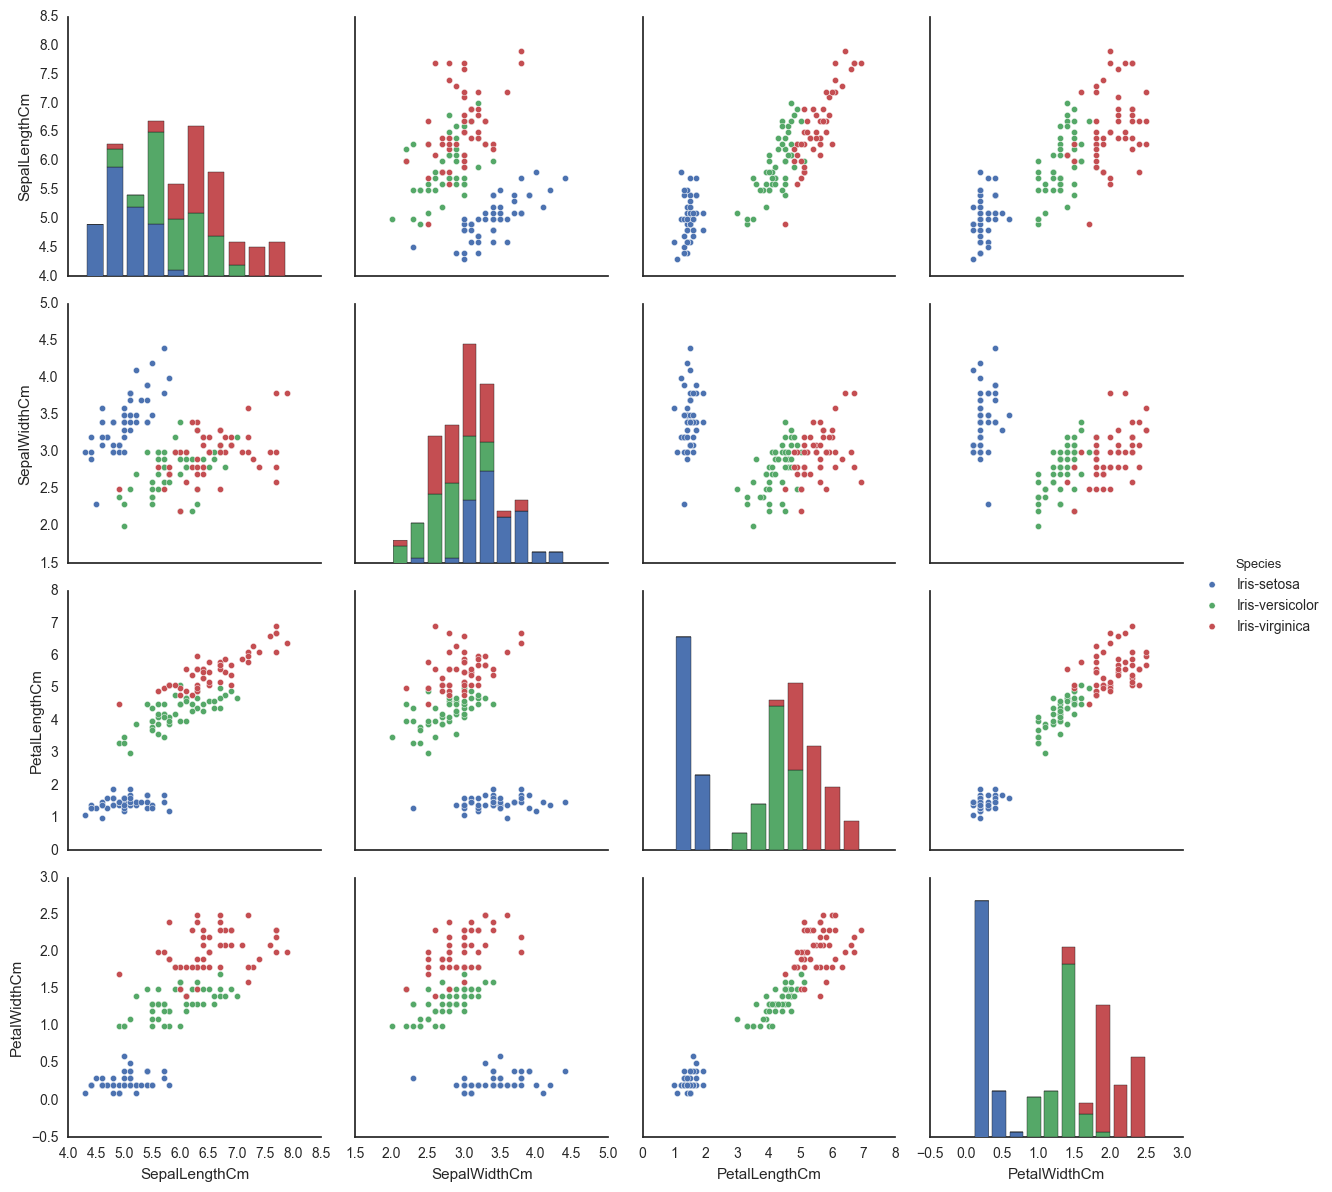

In [21]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

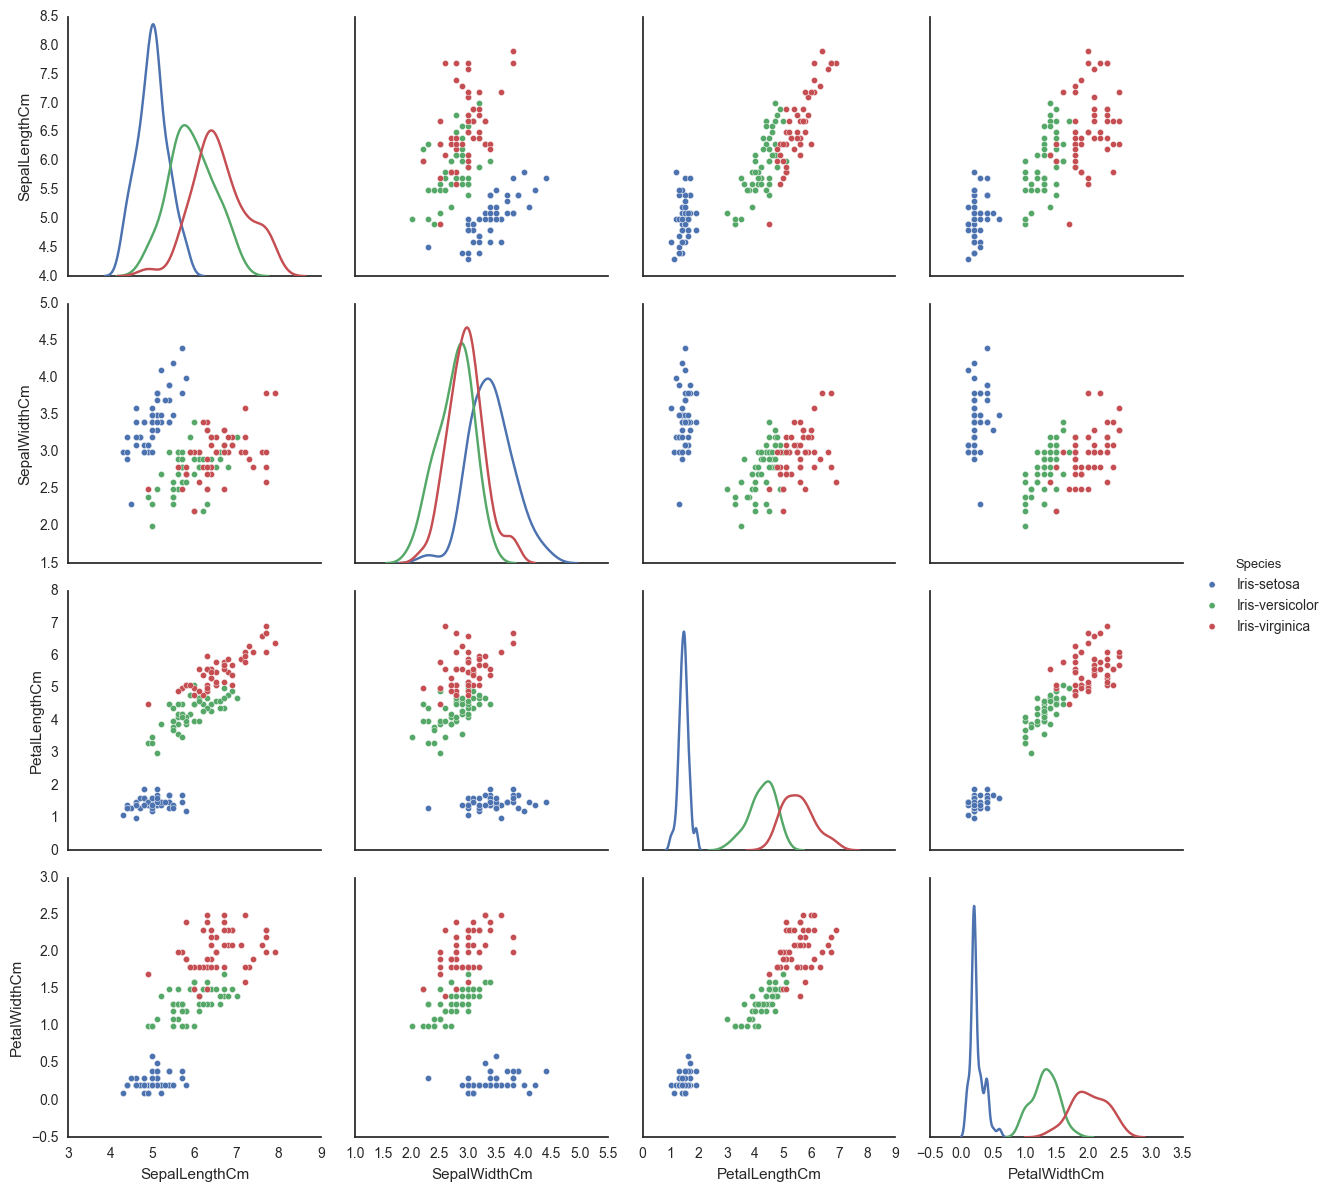

In [20]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

#### This Pair Plot shows how clearly the Setosa Species can be distinguished based on all the features considered .
It is also reflective of the fact that the Veronica Species has the largest attributes in any set of selected features.

#### MultiVariate Analysis using Parallel Coordinates 

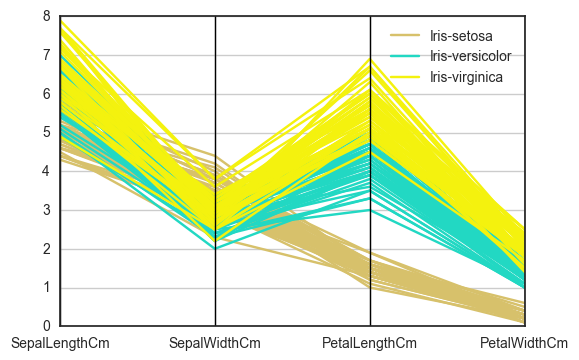

In [25]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

### IRIS Data Classification using KNN,Logistic Regression and SVC Classifier Models 

In [45]:
# Separating the Dataset Features and the Target Label
X = iris.iloc[:,1:4]
y = iris.iloc[:,5]
print X.shape
print y.shape

     SepalLengthCm  SepalWidthCm  PetalLengthCm
0              5.1           3.5            1.4
1              4.9           3.0            1.4
2              4.7           3.2            1.3
3              4.6           3.1            1.5
4              5.0           3.6            1.4
5              5.4           3.9            1.7
6              4.6           3.4            1.4
7              5.0           3.4            1.5
8              4.4           2.9            1.4
9              4.9           3.1            1.5
10             5.4           3.7            1.5
11             4.8           3.4            1.6
12             4.8           3.0            1.4
13             4.3           3.0            1.1
14             5.8           4.0            1.2
15             5.7           4.4            1.5
16             5.4           3.9            1.3
17             5.1           3.5            1.4
18             5.7           3.8            1.7
19             5.1           3.8        

### Split the Dataset into Training and Test Dataset 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print X_train.shape
print X_test.shape

(120, 3)
(30, 3)


### Logistic Regression  Model

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print metrics.accuracy_score(y, y_pred)

0.933333333333


### KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
from sklearn import metrics
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)


1.0


#### Comparing the Prediction of the Trained Model with Actual Target Labels to determine the Accuracy of Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.96


### Determine the Classification Accuracy with varying number of K Nearest Neighbors

In [56]:
k_range = range(1, 26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print X_train.shape
print X_test.shape

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
print "Accuracy Score:",scores

(120, 3)
(30, 3)
Accuracy Score: [0.8666666666666667, 0.90000000000000002, 0.90000000000000002, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.90000000000000002, 0.90000000000000002, 0.8666666666666667, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.93333333333333335, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.83333333333333337, 0.83333333333333337, 0.8666666666666667, 0.8666666666666667]


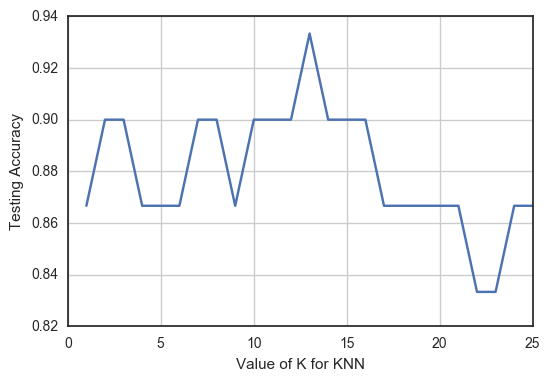

In [54]:
# plot the relationship between K and testing accuracy
fig, ax = plt.subplots()
ax.plot(k_range, scores)
ax.set_xlabel('Value of K for KNN')
ax.set_ylabel('Testing Accuracy')
ax.grid();

In [60]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
xval_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print xval_scores

[ 1.          0.93333333  1.          1.          0.86666667  0.8
  0.93333333  0.93333333  1.          1.        ]


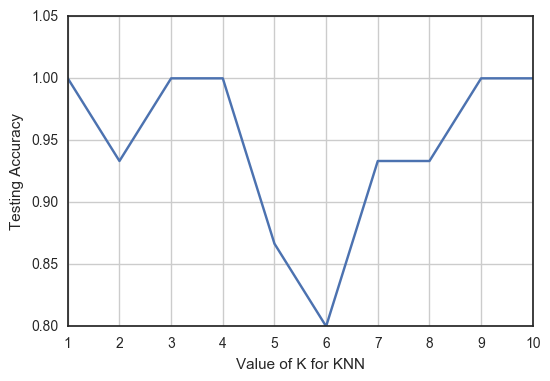

In [64]:
fig, ax = plt.subplots()
ax.plot(range(1,11), xval_scores)
ax.set_xlabel('Value of K for KNN')
ax.set_ylabel('Testing Accuracy')
ax.grid();

In [72]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test, y_test)))



ImportError: No module named xgboost